In [1]:
# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC ,SVR
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'plotly'

In [ ]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

In [ ]:
df.info() 

The output shows that we have around 319795 entries with 18  columns. No null values, and we have 14 numeric features, and 4 categorial features. We can convert the string attributes that has only two possibilities of unique values, but first let's make sure that there is no abnormal values.

In [ ]:
df.nunique()

In [2]:
Age = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df['AgeCategory'] = df['AgeCategory'].apply(lambda x: Age[x])
df['AgeCategory'] = df['AgeCategory'].astype('float')

NameError: name 'df' is not defined

In [3]:
df. rename(columns = {'AgeCategory':'Age'}, inplace = True) #renaming the Agecategory to Age 

NameError: name 'df' is not defined

In [4]:
df.describe()[1:][['Age', 'SleepTime','BMI','PhysicalHealth','MentalHealth']].T.style.background_gradient(cmap='Oranges')

NameError: name 'df' is not defined

Here we get an understanding about the numeric variables in the dataset.

In [112]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking","AlcoholDrinking","Stroke","DiffWalking", "Sex", 'Race', 'Diabetic','PhysicalActivity','GenHealth','Asthma', 'KidneyDisease','SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#f22222', '#52ff00', '#fff800', '#00f3ff']

fig.add_trace(go.Pie(labels=np.array(df['HeartDisease'].value_counts().index),values=[x for x in df['HeartDisease'].value_counts()],textinfo='label+percent', rotation=-45, marker_colors=colours),row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Smoking'].value_counts().index),values=[x for x in df['Smoking'].value_counts()],textinfo='label+percent', marker_colors=colours), row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(df['AlcoholDrinking'].value_counts().index),values=[x for x in df['AlcoholDrinking'].value_counts()], textinfo='label+percent', rotation=-45, marker_colors=colours),row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Stroke'].value_counts().index),values=[x for x in df['Stroke'].value_counts()],textinfo='label+percent', rotation=-45, marker_colors=colours),row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(df['DiffWalking'].value_counts().index), values=[x for x in df['DiffWalking'].value_counts()],textinfo='label+percent', marker_colors=colours),row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(df['Sex'].value_counts().index),values=[x for x in df['Sex'].value_counts()], textinfo='label+percent', marker_colors=colours),row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Race'].value_counts().index),values=[x for x in df['Race'].value_counts()],textinfo='label+percent', rotation=-45, marker_colors=colours),row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(df['PhysicalActivity'].value_counts().index), values=[x for x in df['PhysicalActivity'].value_counts()], textinfo='label+percent', marker_colors=colours), row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Diabetic'].value_counts().index),values=[x for x in df['Diabetic'].value_counts()], textinfo='label+percent', rotation=-45, marker_colors=colours),row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(df['GenHealth'].value_counts().index),values=[x for x in df['GenHealth'].value_counts()],textinfo='label+percent', marker_colors=colours),row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(df['Asthma'].value_counts().index),values=[x for x in df['Asthma'].value_counts()],textinfo='label+percent', rotation=-45, marker_colors=colours),row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(df['KidneyDisease'].value_counts().index), values=[x for x in df['KidneyDisease'].value_counts()], textinfo='label+percent', rotation=-45, marker_colors=colours),row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(df['SkinCancer'].value_counts().index), values=[x for x in df['SkinCancer'].value_counts()], textinfo='label+percent', rotation=-45, marker_colors=colours),row=7, col=1)

fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()

In [113]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

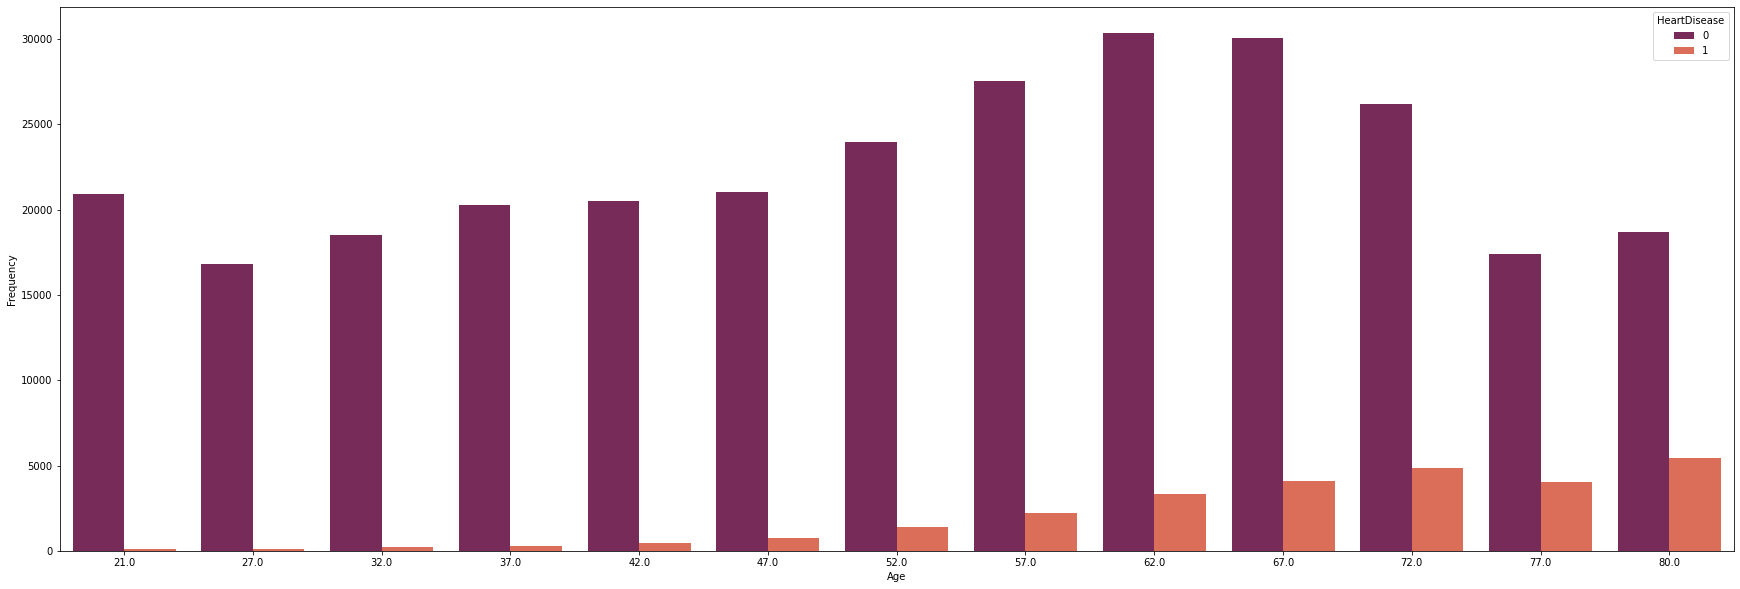

In [114]:
plt.figure(figsize = (30,10))
sns.countplot(x = df['Age'], hue = 'HeartDisease', data = df, palette = 'rocket')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

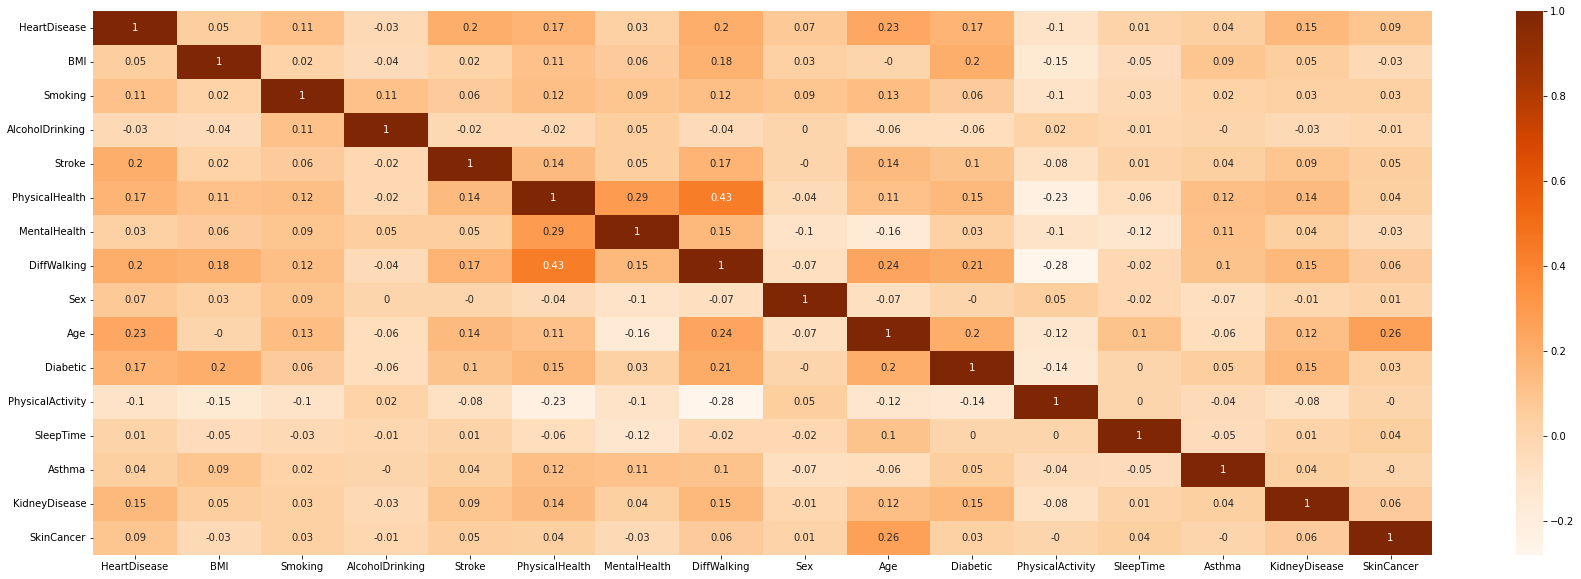

In [115]:
correlation = df.corr().round(2)
plt.figure(figsize = (30,10))
sns.heatmap(correlation, annot = True, cmap = 'Oranges')

HeartDisease has the highest correlation to Stroke, DiffWalking,Age, Physical health and diabetes.
Physical health and mental health also have a correlation.

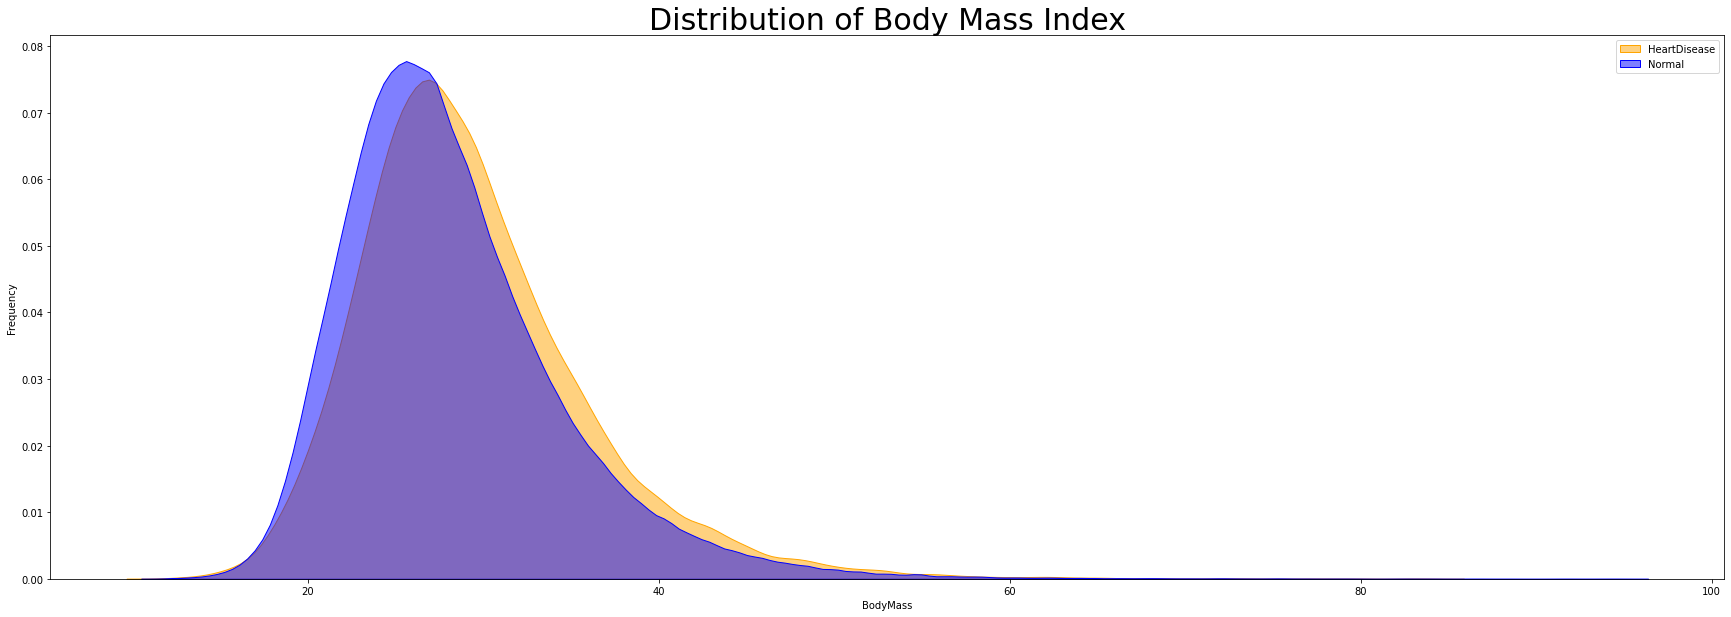

In [116]:
fig, ax = plt.subplots(figsize = (30,10))
sns.kdeplot(df[df["HeartDisease"]==1]["BMI"], alpha=0.5,shade = True, color="orange", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["HeartDisease"]==0]["BMI"], alpha=0.5,shade = True, color="blue", label="Normal", ax = ax)
plt.title('Distribution of Body Mass Index', fontsize = 30)
ax.set_xlabel("BodyMass")
ax.set_ylabel("Frequency")
ax.legend();
plt.show()

In [117]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
categ = df[['Age', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())

#Likning the encoed_cateh with the df
df = pd.concat([df, encoded_categ], axis = 1)

# Dropping the categorical features
df = df.drop(columns = ['Age', 'Race', 'GenHealth'], axis = 1)

In [118]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 38)
Shape of testing feature: (63959, 38)
Shape of training label: (255836,)
Shape of training label: (63959,)


In [119]:
            def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
      # Predict Test Data 
    y_pred = model.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred) #calculating theaccuracy
    prec = metrics.precision_score(y_test, y_pred) #calculating precision
    rec = metrics.recall_score(y_test, y_pred) #calculating recall
    f1 = metrics.f1_score(y_test, y_pred) #calculating f1
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    cm = metrics.confusion_matrix(y_test, y_pred) #confussion matrix

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train) #model
knn_eval = evaluate_model(knn, X_test, y_test) #Model evaluation

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Accuracy: 0.9071123688613018
Precision: 0.35751295336787564
Recall: 0.11402864487697392
F1 Score: 0.17290825560350828
Cohens Kappa Score: 0.1373846447049204
Area Under Curve: 0.6994903480711547
Confusion Matrix:
 [[57397  1116]
 [ 4825   621]]


In [121]:
from sklearn import tree

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

clf_eval = evaluate_model(clf, X_test, y_test) #Model Evaluation

#Results
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Accuracy: 0.86560140089745
Precision: 0.2347591781744695
Recall: 0.2559676827029012
F1 Score: 0.2449051300070274
Cohens Kappa Score: 0.17129246113576335
Area Under Curve: 0.5895004835188936
Confusion Matrix:
 [[53969  4544]
 [ 4052  1394]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

